# Attendance Viewer  and Calculator

### Importing Libraries

In [49]:
# Computational Libraries
import pandas as pd
import numpy as np
import seaborn as sns
# To display inline visualizations
%matplotlib inline
# For sleep method
import time
# Configuration File
import config

In [2]:
# Selenium (for fetching data)
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

##### Starting Execution Timer

In [3]:
start_time = time.perf_counter()

### Fetching Data from ERP

In [5]:
url = config.URL

In [6]:
try:
    driver = webdriver.Firefox()
except:
    driver = webdriver.Chrome()

In [7]:
driver.get(url)

In [8]:
u = driver.find_element_by_name(config.UNAME_ID)
u.send_keys(config.UNAME)
p = driver.find_element_by_name(config.PASS_ID)
p.send_keys(config.PASS)
p.send_keys(Keys.RETURN)
time.sleep(2)

In [9]:
try:
    attendance = driver.find_element_by_id("aAttandance")
except:
    time.sleep(2)
    attendance = driver.find_element_by_id("aAttandance")

In [10]:
attendance.click()

In [11]:
table = driver.find_element_by_class_name("table100")
head = table.find_element_by_tag_name("thead")
body = table.find_element_by_tag_name("tbody")

In [12]:
table_list = []
for row in body.find_elements_by_tag_name("tr"):
    for col in row.find_elements_by_tag_name("td"):
        table_list.append(col.text)

In [13]:
driver.close()

### Processing Data

In [14]:
table_list = list(filter(lambda x: (len(x) > 0) and (len(x) <= 4) and ("%" not in x), table_list))

In [15]:
somelist = [i for j, i in enumerate(table_list) if j not in range(0,len(table_list), 5)]

In [16]:
somelist = [i for j, i in enumerate(somelist) if j not in range(3, len(somelist), 4)]

In [17]:
arr = np.array(list(map(int, somelist))).reshape(6, 3)[:, 1:]


### Initializing Subjects

In [18]:
total = {sub : [0 for i in range(config.N_ATTRIBUTES)] for sub in config.SUBJECTS}

In [19]:
for sub, sub_arr in zip(total, arr):
    total[sub][1] = sub_arr[0]
    total[sub][2] = sub_arr[1]

### Initializing Time Table

In [20]:
tt = {
    config.MON : config.N_MON,
    config.TUE : config.N_TUE,
    config.WED : config.N_WED,
    config.THU : config.N_THU,
    config.FRI : config.N_FRI
}

In [21]:
def fun(l, c):
    for i in range(c):
        for j in l:
            total[j][0] += 1
    return None

In [22]:
x = [fun(i, tt[i]) for i in tt]

### Converting to Pandas DataFrame

In [23]:
df = pd.DataFrame(total, index=config.ATTRIBUTES)

In [24]:
df = df.T

In [25]:
df = df.reset_index()

In [26]:
df.rename(columns={"index" : "Subjects"}, inplace=True)

### Calculating Attendance

In [27]:
df["Attendance(%)"] = (df["Present"] / (df["Present"] + df["Absent"])) * 100

### Setting Attendence Threshold

In [28]:
thresh = config.THRESHOLD

### Calculating Bunks

In [29]:
df["Bunks Left"] = np.floor((thresh * df["Total"]) - (df["Absent"]))

In [30]:
df["Total Bunks"] = np.floor((thresh * df["Total"]))

### Displaying Output DataFrame

In [31]:
df

,Subjects,Total,Present,Absent,Attendance(%),Bunks Left,Total Bunks
0,AI,46,10,1,90.909091,10.0,11.0
1,SE,63,8,2,80.000000,13.0,15.0
2,ES,77,9,3,75.000000,16.0,19.0
3,IS&C,61,9,2,81.818182,13.0,15.0
4,CC,46,8,1,88.888889,10.0,11.0
5,CTC,15,1,0,100.000000,3.0,3.0


##### Displaying Code Execution Time

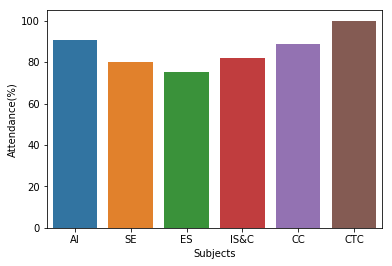

In [32]:
sns.barplot(data=df, x="Subjects", y="Attendance(%)").get_figure().savefig("MyAttendance.png", dpi=150)

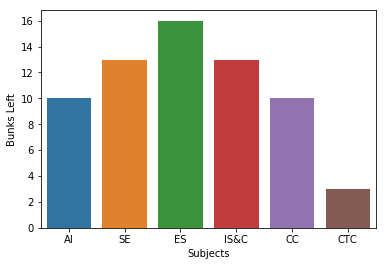

In [33]:
sns.barplot(data=df, x="Subjects", y="Bunks Left").get_figure().savefig("MyBunks.png", dpi=150)

In [34]:
end_time = time.perf_counter() - start_time
print("Automation executed in", end_time, "seconds")

Automation executed in 62.147120032892175 seconds


In [50]:
root = tk.Tk()

left = tk.PanedWindow(root)
right = tk.PanedWindow(root)
# container = tk.Frame(left, borderwidth=2, relief="solid")
# box1 = tk.Frame(right, borderwidth=2, relief="solid")
# box2 = tk.Frame(right, borderwidth=2, relief="solid")

img_attendance = ImageTk.PhotoImage(Image.open("MyAttendance.png"))
panel_one = tk.Label(left, image = img_attendance)

img_bunks = ImageTk.PhotoImage(Image.open("MyBunks.png"))
panel_two = tk.Label(right, image = img_bunks)

left.pack(expand=True, fill="both")
# right.pack(side="right", expand=True, fill="both")
# container.pack(expand=True, fill="both", padx=5, pady=5)
# box1.pack(expand=True, fill="both", padx=10, pady=10)
# box2.pack(expand=True, fill="both", padx=10, pady=10)

left.add(panel_one)
left.add(panel_two)

root.mainloop()

TclError: image "pyimage16" doesn't exist

In [47]:
from tkinter import *
root = Tk()

m = PanedWindow(root)
m.pack(fill=BOTH, expand=1)

text1 = Text(m, height=15, width =15)
m.add(text1) 

text2=Text(m, height=15, width=15)
m.add(text2) 

root.mainloop()